In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob


In [ ]:
filename1='yob1880.txt'
df = pd.read_table(filename1, names= ['name', 'sex', 'number'], sep=',')
print(df.shape)
print(df.head)


(2000, 3)
<bound method NDFrame.head of            name sex  number
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]>


In [ ]:
# Gathering file names of collections of names, sorted
filenames = sorted(glob.glob('yob*.txt'))
print(len(filenames))
print(filenames[0])



144
yob1880.txt


In [ ]:
# Get top n names for each year
n = 10
year = 1880
combined_girl_list = pd.DataFrame(columns = ['name', 'sex', 'number', 'year'])
for i in filenames:
  df = pd.read_table(i, names = ['name', 'sex', 'number'], sep = ',')
  df['year'] = year
  combined_girl_list = pd.concat([combined_girl_list, df[:n]])
  year = year + 1


In [ ]:
print(combined_girl_list.head(15))

        name sex number  year
0       Mary   F   7065  1880
1       Anna   F   2604  1880
2       Emma   F   2003  1880
3  Elizabeth   F   1939  1880
4     Minnie   F   1746  1880
5   Margaret   F   1578  1880
6        Ida   F   1472  1880
7      Alice   F   1414  1880
8     Bertha   F   1320  1880
9      Sarah   F   1288  1880
0       Mary   F   6919  1881
1       Anna   F   2698  1881
2       Emma   F   2034  1881
3  Elizabeth   F   1852  1881
4   Margaret   F   1658  1881


# New Section

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Path to folder
folder_path = '/content/drive/MyDrive/names'

#Reading all yearly files and joining
all_years_data = []

for filename in os.listdir(folder_path):
    if filename.startswith("yob") and filename.endswith(".txt"):
        year = int(filename[3:7])
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, names=["name", "sex", "count"])
        df['year'] = year
        all_years_data.append(df)

In [ ]:
#combining into one DataFrame
names_df = pd.concat(all_years_data, ignore_index=True)

#Making all names the same for consistancy
names_df.columns = names_df.columns.str.lower()

#Pulling random set of 5 from all the data for format look
print(f"Dataset shape: {names_df.shape}")
print("Sample rows:")
print(names_df.sample(5))
print("\nMissing values:\n", names_df.isnull().sum())

Dataset shape: (2117219, 4)
Sample rows:
           name sex  count  year
532320   Arturo   F      5  1956
796119   Carena   F     13  1977
1433510   Bonny   F     10  2003
510888     Vern   F      5  1955
44967    Burton   M     42  1896

Missing values:
 name     0
sex      0
count    0
year     0
dtype: int64


   year   count
0  1880  201484
1  1881  192688
2  1882  221533
3  1883  216945
4  1884  243461


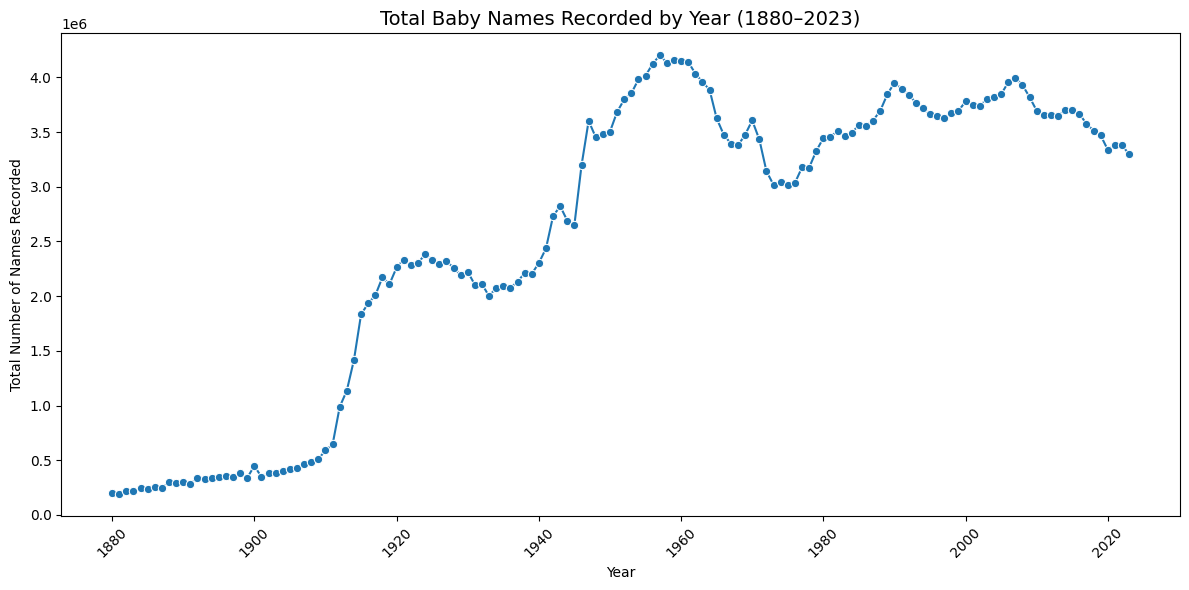

In [ ]:
#Name trends over time graph

names_by_year = names_df.groupby('year')['count'].sum().reset_index()

print(names_by_year.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=names_by_year, x='year', y='count', marker='o')
plt.title('Total Baby Names Recorded by Year (1880–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Number of Names Recorded')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To explore how phonetic structure and cultural shifts influence baby name trends in the U.S., we conducted an exploratory data analysis using Social Security baby name records from 1880 to 2023. We combined 144 yearly text files into a single dataset of over 2.1 million records, confirming data quality through standard preprocessing steps. Visualizations revealed distinct periods of naming diversity, with trends reflecting social and cultural changes over time. Notably, recent decades show a move toward more unique and varied names, especially among boys.

In [ ]:
import pandas as pd
import os

folder_path = '/content/drive/MyDrive/SSN'

all_years_data = []

for filename in sorted(os.listdir(folder_path)):
    if filename.startswith("yob") and filename.endswith(".txt"):
        year = int(filename[3:7])
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, names=["name", "sex", "count"])
        df["year"] = year
        all_years_data.append(df)

names_df = pd.concat(all_years_data, ignore_index=True)
print(names_df.shape)
names_df.head()


(2117219, 4)


,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import string

def count_vowels(name):
    return sum(1 for char in name.lower() if char in 'aeiou')

def count_consonants(name):
    return sum(1 for char in name.lower() if char in string.ascii_lowercase and char not in 'aeiou')

def ends_in(name, letter):
    return name.lower().endswith(letter)

names_df['vowel_count'] = names_df['name'].apply(count_vowels)
names_df['consonant_count'] = names_df['name'].apply(count_consonants)
names_df['ends_in_a'] = names_df['name'].apply(lambda x: ends_in(x, 'a'))
names_df['ends_in_y'] = names_df['name'].apply(lambda x: ends_in(x, 'y'))

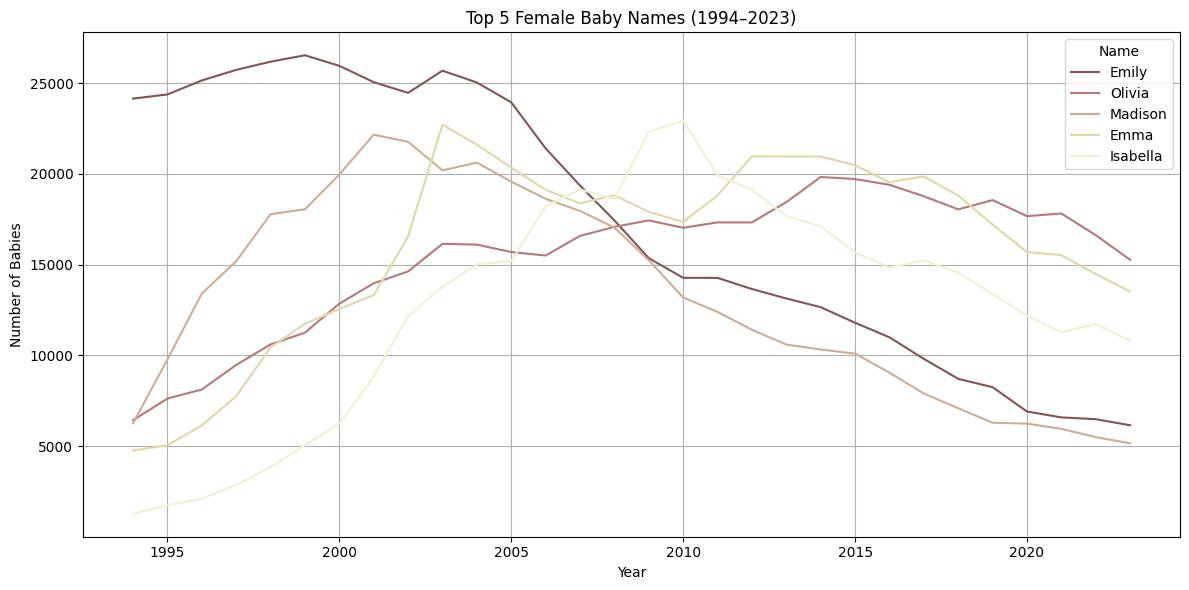

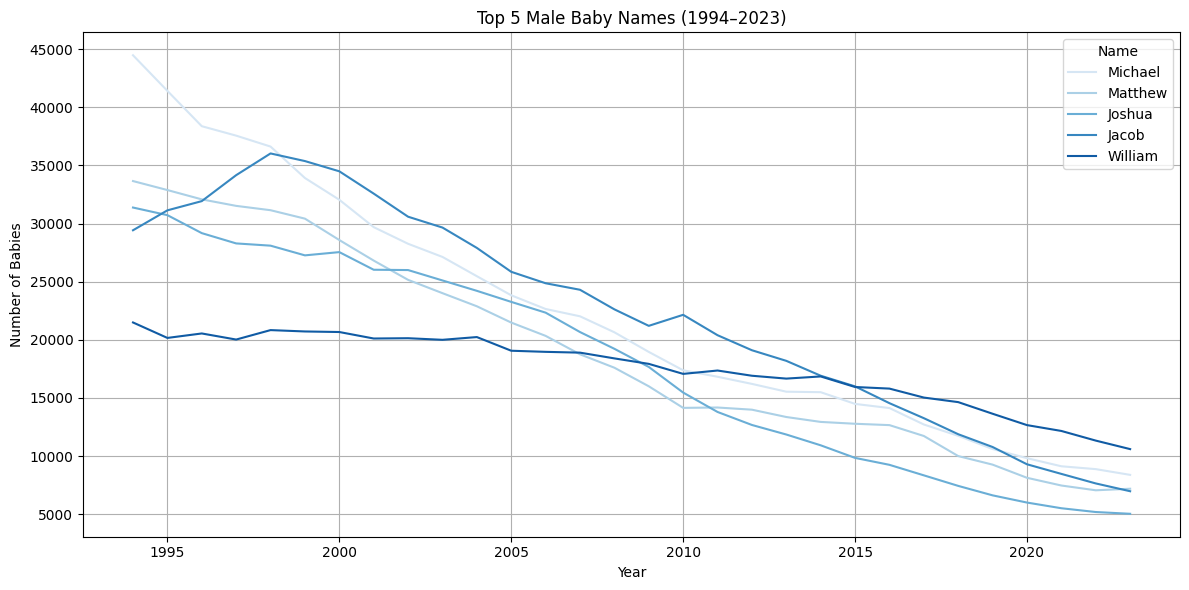

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = all_years_df.copy()

recent_df = df[df['year'] >= 1994]

top_female_names = recent_df[recent_df['sex'] == 'F'].groupby('name')['count'].sum().nlargest(5).index
top_male_names = recent_df[recent_df['sex'] == 'M'].groupby('name')['count'].sum().nlargest(5).index

filtered_female = recent_df[(recent_df['sex'] == 'F') & (recent_df['name'].isin(top_female_names))]
filtered_male = recent_df[(recent_df['sex'] == 'M') & (recent_df['name'].isin(top_male_names))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_female, x='year', y='count', hue='name', palette='pink')
plt.title("Top 5 Female Baby Names (1994–2023)")
plt.ylabel("Number of Babies")
plt.xlabel("Year")
plt.legend(title='Name')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_male, x='year', y='count', hue='name', palette='Blues')
plt.title("Top 5 Male Baby Names (1994–2023)")
plt.ylabel("Number of Babies")
plt.xlabel("Year")
plt.legend(title='Name')
plt.grid(True)
plt.tight_layout()
plt.show()

Top 5 Female Baby Names (1994–2023):
This line chart shows the popularity trends of the top 5 female baby names over the past 30 years. Names like Emily, Olivia, and Emma experienced peaks in the early 2000s, while Olivia and Emma remained consistently popular through the 2010s. We can observe noticeable declines in Emily and Madison, suggesting shifts in naming preferences among new parents.

Top 5 Male Baby Names (1994–2023):
The chart displays how the popularity of male baby names such as Michael, Jacob, and Joshua have gradually declined over time. While William shows a more stable trend, names like Matthew and Michael had higher usage in the 1990s but have become less common in recent years. These patterns reflect evolving cultural and generational naming trends among boys.


# Average Name Popularity by Vowel Count (Split by Gender)

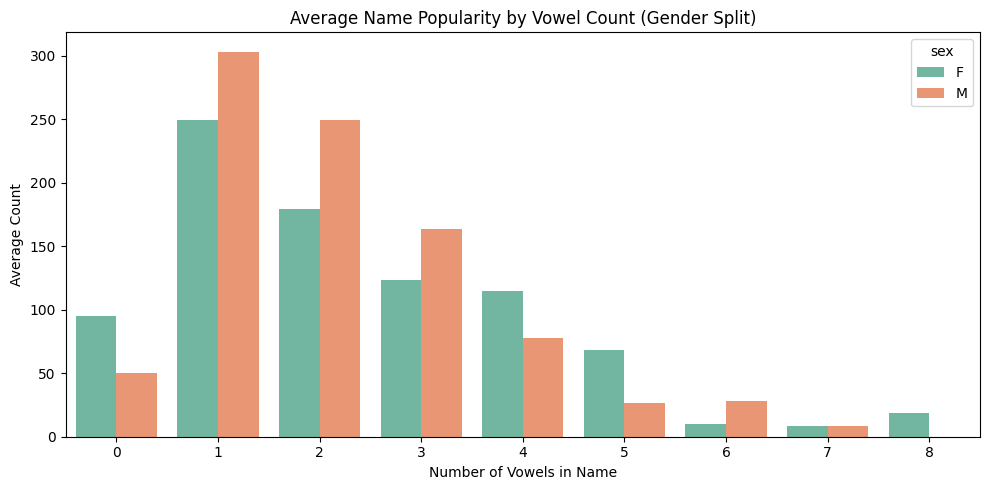

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=names_df.groupby(['sex', 'vowel_count'])['count'].mean().reset_index(),
    x='vowel_count', y='count', hue='sex', palette='Set2'
)
plt.title("Average Name Popularity by Vowel Count (Gender Split)")
plt.xlabel("Number of Vowels in Name")
plt.ylabel("Average Count")
plt.tight_layout()
plt.show()

This chart shows that names with 1 to 2 vowels are the most popular for both boys and girls, especially for boys. Girls' names tend to spread more evenly across 2 to 4 vowels. This suggests that simpler sounding names with fewer vowels are more common, particularly for male names.

# Average Name Popularity by Consonant Count (Split by Gender)

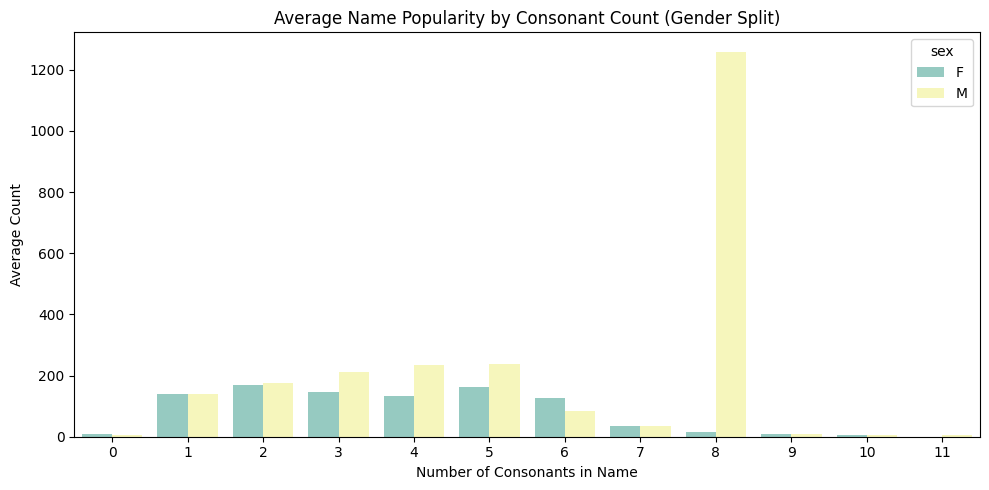

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=names_df.groupby(['sex', 'consonant_count'])['count'].mean().reset_index(),
    x='consonant_count', y='count', hue='sex', palette='Set3'
)
plt.title("Average Name Popularity by Consonant Count (Gender Split)")
plt.xlabel("Number of Consonants in Name")
plt.ylabel("Average Count")
plt.tight_layout()
plt.show()

In [ ]:
names_df[names_df['consonant_count'] == 8].groupby('name')['count'].sum().sort_values(ascending=False).head(10)


,count
name,
Christopher,2069127
Khristopher,2280
Maryelizabeth,2065
Konstantinos,2043
Markanthony,1778
Gwendolynn,1397
Marcanthony,1378
Christpher,1304
Kimberlynn,1054


Most popular names tend to have 2 to 5 consonants. There’s a sharp spike at 8 consonants, mainly driven by the name Christopher, which appears over 2 million times. Aside from that outlier, names with a moderate number of consonants are generally more common.

# Names Ending in 'a' or 'y' – Average Popularity by Gender

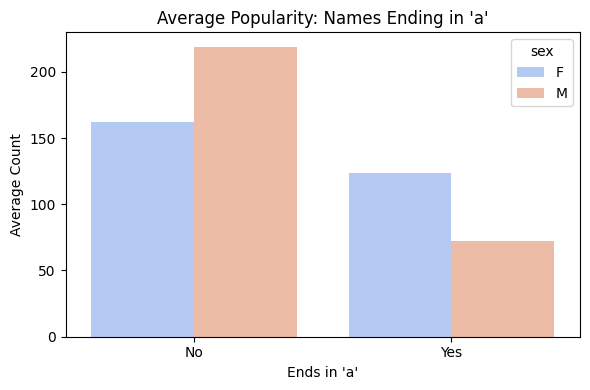

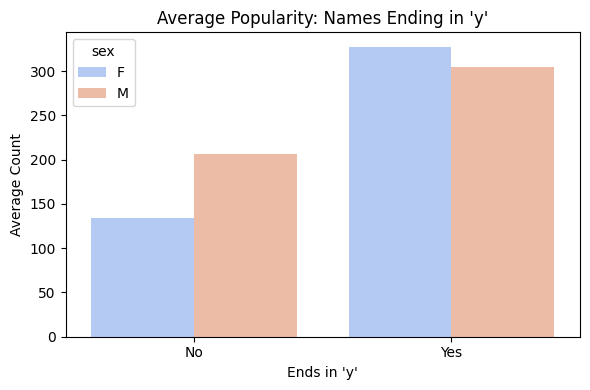

In [ ]:
# Prep data for plotting
ending_summary = names_df.groupby(['sex', 'ends_in_a', 'ends_in_y'])['count'].mean().reset_index()

# Visualize names ending in 'a'
plt.figure(figsize=(6, 4))
sns.barplot(
    data=names_df.groupby(['sex', 'ends_in_a'])['count'].mean().reset_index(),
    x='ends_in_a', y='count', hue='sex', palette='coolwarm'
)
plt.title("Average Popularity: Names Ending in 'a'")
plt.xlabel("Ends in 'a'")
plt.ylabel("Average Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# Visualize names ending in 'y'
plt.figure(figsize=(6, 4))
sns.barplot(
    data=names_df.groupby(['sex', 'ends_in_y'])['count'].mean().reset_index(),
    x='ends_in_y', y='count', hue='sex', palette='coolwarm'
)
plt.title("Average Popularity: Names Ending in 'y'")
plt.xlabel("Ends in 'y'")
plt.ylabel("Average Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

Names ending in “a” are more popular for girls, while boys' names are more common when they do not end in “a.” This supports the idea that certain phonetic endings like “a” tend to sound more feminine, influencing naming preferences by gender.

Names ending in “y” are more popular on average for both girls and boys. This suggests that the “y” ending may have a broadly appealing sound that influences naming choices across genders.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install cinemagoer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 7.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os

data_folder = '/content/drive/MyDrive/names'

all_years = []

for filename in os.listdir(data_folder):
    if filename.startswith('yob') and filename.endswith('.txt'):
        year = int(filename[3:7])
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path, names=['name', 'sex', 'count'])
        df['year'] = year
        all_years.append(df)

baby_names = pd.concat(all_years, ignore_index=True)

baby_names.head()

,name,sex,count,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [ ]:
from imdb import IMDb

ia = IMDb()

frozen = ia.search_movie('Frozen')[0]

ia.update(frozen)

print(f"Title: {frozen['title']}")
print(f"Year: {frozen['year']}")
print("Cast:", [person['name'] for person in frozen['cast'][:5]])

Title: Frozen
Year: 2013
Cast: ['Kristen Bell', 'Idina Menzel', 'Jonathan Groff', 'Josh Gad', 'Santino Fontana']


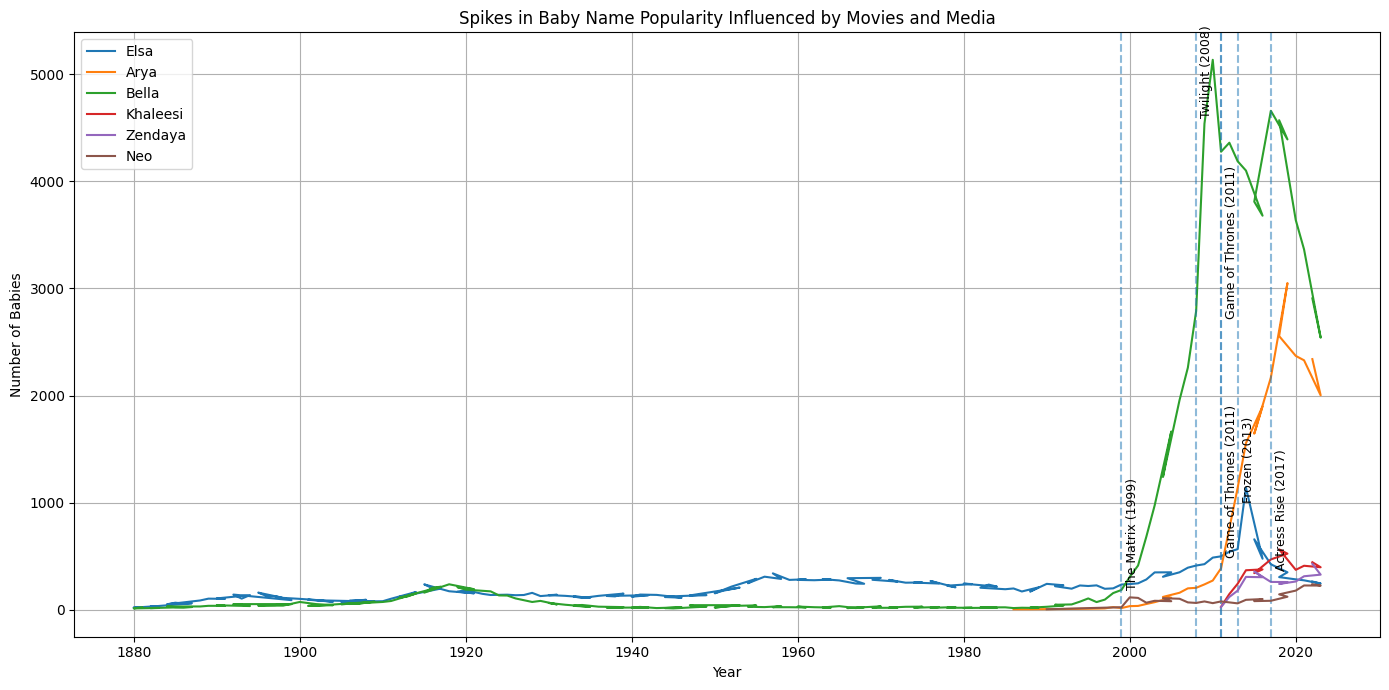

In [ ]:
import matplotlib.pyplot as plt

media_names_info = {
    'Elsa': {'event': 'Frozen', 'year': 2013, 'gender': 'F'},
    'Arya': {'event': 'Game of Thrones', 'year': 2011, 'gender': 'F'},
    'Bella': {'event': 'Twilight', 'year': 2008, 'gender': 'F'},
    'Khaleesi': {'event': 'Game of Thrones', 'year': 2011, 'gender': 'F'},
    'Zendaya': {'event': 'Actress Rise', 'year': 2017, 'gender': 'F'},
    'Neo': {'event': 'The Matrix', 'year': 1999, 'gender': 'M'}
}

plt.figure(figsize=(14, 7))

for name, info in media_names_info.items():
    df = baby_names[(baby_names['name'] == name) & (baby_names['sex'] == info['gender'])]
    if not df.empty:
        plt.plot(df['year'], df['count'], label=name)
        plt.axvline(info['year'], linestyle='--', alpha=0.5)
        plt.text(info['year'] + 0.5, df['count'].max() * 0.9,
                 f"{info['event']} ({info['year']})", rotation=90, fontsize=9)

plt.title('Spikes in Baby Name Popularity Influenced by Movies and Media')
plt.xlabel('Year')
plt.ylabel('Number of Babies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


To investigate the potential influence of media and pop culture on baby name popularity, we focused on names that were prominently associated with cultural events such as major film and TV releases, as well as rising celebrity figures. We selected a set of names—Elsa, Arya, Bella, Khaleesi, Zendaya, and Neo—which were linked to movies, television series, or personalities.
The first step in our analysis involved identifying the specific years associated with each name’s surge in popularity. These cultural milestones were used as a center points to examine trends in baby name usage, and we compared these spikes to broader naming patterns from our dataset.
Using the baby names dataset from the Social Security records, we tracked the frequency of these names in the years before and after their media events. We then plotted the popularity trends of these names across time, adding vertical markers to highlight the years when each event took place. This allowed us to visually assess how closely the popularity of these names mirrored the release of the associated media, and to determine if there was a direct correlation between the two.
Through this approach, we aimed to quantify the extent to which media exposure influences naming preferences, providing a deeper understanding of the intersection between cultural events and naming trends.

# Summary of EDA Findings

From our exploratory analysis, we found consistent phonetic patterns in baby names across gender. Names with soft vowel endings like "a" were clearly associated with girls, while names with 2–5 consonants were more common for both genders. Interestingly, individual names like "Christopher" can significantly skew the data when extremely popular. Recent trends from the last 30 years show a decline in traditionally dominant names, especially among boys, indicating a possible cultural shift toward uniqueness.

We also observed that cultural and media events can cause short-term surges in name popularity. Names such as Bella and Arya showed noticeable spikes following the release of Twilight and Game of Thrones, respectively, suggesting that media influence can override traditional naming patterns in some cases. These event-driven naming trends offer valuable insight into the dynamic interplay between pop culture and personal identity.

These insights provide a strong foundation for further modeling work. In future steps, we plan to use this phonetic and trend data to predict which names are most likely to rise or fall in popularity.
